In [49]:
import requests
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Probability distributions

- We would like to describe a distribution of data in concisely. For example, the normal distribution with only two parameters $\mu$ and $\sigma$ may represent any data of such distribution.

In [50]:
# https://github.com/avehtari/ROS-Examples
datafile = 'ROS-Examples/PearsonLee/data/Heights.txt'
df = pd.read_csv(datafile, delimiter=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daughter_height  5524 non-null   float64
 1   mother_height    5524 non-null   float64
dtypes: float64(2)
memory usage: 86.4 KB


In [51]:
mean, std = df['daughter_height'].mean(), df['daughter_height'].std()

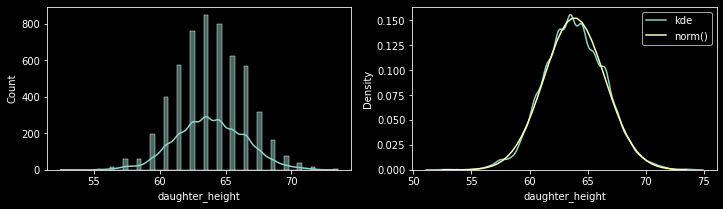

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
sns.histplot(df['daughter_height'], kde=True, ax=axes[0]);
#
sns.kdeplot(df['daughter_height'], ax=axes[1], label='kde')
x = np.linspace(df['daughter_height'].min(), df['daughter_height'].max(), 50)
axes[1].plot(x, stats.norm.pdf(loc=mean, scale=std, x=x), label='norm()');
axes[1].legend();


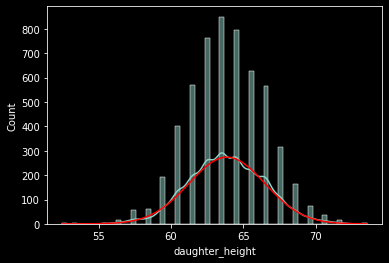

In [53]:
ax = sns.histplot(df['daughter_height'], kde=True);
x = np.linspace(df['daughter_height'].min(), df['daughter_height'].max(), 50)
ax.plot(x, 1800*stats.norm.pdf(loc=mean, scale=std, x=x), color='red');


**Try** with `mother_height`.

Normal Distribution
$$
    p(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{ -\frac{z^2}{2} \bigg\} , \quad  z=\frac{x-\mu}{\sigma}
$$

$$
    F(X < x|\mu, \sigma) = \int_{-\infty}^x \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{ -\frac{z^2}{2} \bigg\} dx, \quad  z=\frac{x-\mu}{\sigma}
$$

# Expectations and Simulation with Pseudo Random Sampling

## Expectation
- A function $f$ is called a linear operator if $f(ax+by) = af(x) + bf(y)$ for all $x$ and $y$ and constants $a$ and $b$
- Expectation

\begin{align}
        \mathbb{E}[f(X)] & = \sum_i p(x_i) f(x_i) \quad\mbox{PMF}\\
                         & = \int_\Omega dx p(x) f(x) \quad\mbox{PDF}
\end{align}

-  Expection is a linear operator:

\begin{align}
        \mathbb{E}[aX + bY] & = \sum_{x,y}(ax + by)p_{X,Y}(x,y) \\
                            & = \sum_x \sum_y (ax p_{X,Y}(x, y)) + \sum_x \sum_y(by p_{X,Y}(x,y))\\
                            & = \sum_x \left(
                              ax \sum_y (p_{X,Y}(x, y))
                            \right)
                             +
                            \sum_y
                            \left(
                              by \sum_x p_{X,Y}(x,y)
                            \right) \\
                            & = a\mathbb{E}[X] + b\mathbb{E}[Y]
\end{align}


- Examples
$$
    \mathbb{E}[X] = \int_\Omega dx p(x) x \\
    \mathbb{E}[X^2] = \int_\Omega dx p(x) x^2
$$
- Useful Formula.
$$
    \mathbb{E}[X] = \mu \\
    \mathbb{E}[ a X + b ] = a \mathbb{E}[X] + b
$$
$$
    \mathbb{V}[X] = \mathbb{E}[ (X-\mu)^2 ] = \sigma^2 = \mathbb{E}[X^2] - \mu^2 \\
    \mathbb{V}[aX+b] = \mathbb{E}[ (aX-a\mu)^2 ] = a^2\mathbb{E}[ (X-\mu)^2 ] =a^2 \mathbb{V}[X]
$$

## Simulation
Calculation with samples.

In [54]:
n_samples = 100000

In [55]:
rs = stats.norm.rvs(loc=0, scale=1, size=(n_samples))

In [56]:
# expection
mean = rs.sum() / n_samples
# variance = mean of squared deviation from the mean
var = np.sum((rs - mean)**2) / n_samples
# standard deviation = sqrt of var
std = np.sqrt(var)

In [57]:
print(mean, std)

-0.003068879861219426 1.0005431765974482


Now a random variable which is equivalent to the affinely transformed version.

In [58]:
# X_2 = X * 2 + 1
rs2 = stats.norm.rvs(loc=5, scale=2, size=n_samples)

In [59]:
# expection
mean2 = rs2.sum() / n_samples
# variance = mean of squared deviation from the mean
var2 = np.sum((rs2 - mean2)**2) / n_samples
# standard deviation = sqrt of var
std2 = np.sqrt(var2)

In [60]:
print(mean2, std2)

4.995365469832365 1.9929924275843374


The result may also be obtained by simple affine transformation:

In [61]:
# apply the formula to get the mean and std for X_2
mean22 = 2*mean + 5
var22 = 2**2 * var2
std22 = np.sqrt(var22)
print(mean22, std22)

4.993862240277561 3.9859848551686747


- The difference is caused by the computation from samples.
- By increasing the number of samples, the difference do decrease. 
- With infinitely many samples, no difference will occur.

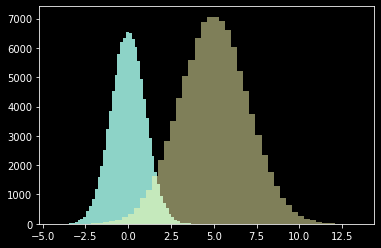

In [62]:
plt.hist(rs, bins=50);
plt.hist(rs2, alpha=.5, bins=50);

## Sum of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 + X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] + \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} + \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 }
\end{align}

In [63]:
n_samples = 1000000

In [64]:
X1 = stats.norm.rvs(loc= 3, scale=2, size=n_samples)
X2 = stats.norm.rvs(loc= 7, scale=2, size=n_samples)

In [65]:
Y = X1 + X2

In [66]:
X1.mean(), X2.mean(), Y.mean()

(2.9983514184802478, 6.999661436862492, 9.998012855342745)

In [67]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(2.003813718263028, 2.000440109170223, 2.831774566508254, 2.831436039870241)

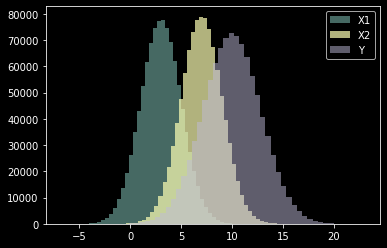

In [68]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

## Difference of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 - X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] - \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} - \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 } \quad\quad\mbox{the same!}
\end{align}

In [69]:
n_samples = 1000000

In [70]:
X1 = stats.norm.rvs(loc=-3, scale=2, size=n_samples)
X2 = stats.norm.rvs(loc= 3, scale=2, size=n_samples)

In [71]:
Y = X1 - X2

In [72]:
X1.mean(), X2.mean(), Y.mean()

(-2.998100490670188, 3.001387541551327, -5.9994880322215165)

In [73]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(1.997318630777074, 1.9995567595447843, 2.823504190115311, 2.8262181351570237)

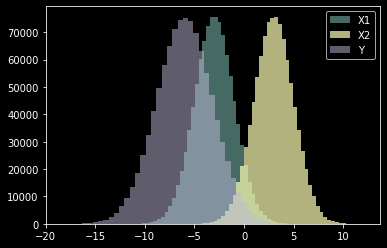

In [74]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Let's try it with two **uniform distributions**.

```scipy.stats.uniform``:
In the standard form, the distribution is uniform on `[0, 1]`. Using the parameters `loc` and `scale`, one obtains the uniform distribution on `[loc, loc + scale]`.

In [75]:
X1 = stats.uniform.rvs(0, 2, size=n_samples)
X2 = stats.uniform.rvs(loc=4, scale=2, size=n_samples)

In [76]:
Y = X1 - X2

In [77]:
X1.mean(), X2.mean(), Y.mean()

(1.0003507693896356, 4.9998095959168385, -3.9994588265272037)

In [78]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(0.5774623922388542, 0.5772330087049238, 0.8161780717930716, 0.816492964322877)

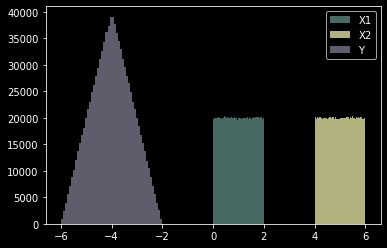

In [79]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Implications:
- The difference is normal if $X_1$ and $X_2$ is normals.

## Mean of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = \frac{1}{n}\sum_i X_i
\end{align}
where $X_i$s are independent identically distributed (iid) random variables with mean $\mu$ and std $\sigma$.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \frac{1}{n}\sum_i \mathbb{E}[X_i] = \mu\\
    \mathbb{V}[Y] & = \mathbb{V}\bigg[\frac{1}{n}\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\mathbb{V}\bigg[\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\sum_i\mathbb{V}\big[X_i\big] \quad\mbox{independence, uncorrelated}\\
                  & = \frac{1}{n^2}\sum_i \sigma^2 \\
                  & = \frac{1}{n} \sigma^2 \\
    Std(Y) &= \frac{\sigma}{\sqrt{n}}   \quad \mbox{called 'standard error'}
\end{align}
- Implication:
    - $Y$ is a mean estimator. It is a function that tries to estimate the mean of the distribution of r.v. $X$.
    - measure as many $X$'s as possible, and compute its mean $Y$.
    - the expectation of $Y$ approaches to the true mean $\mu$ in the limit.
    - the standard deviation of $Y$ approaches to 0.
    - the std of $Y$ is actually the error of the mean estimator $Y$. So it is called the **standard error** (SE).

In [80]:
n_samples = 10000
std = 1

In [81]:
n = 10
X_s = np.array([stats.norm.rvs(loc=0, scale=std, size=n) for _ in range(n_samples)])
X_s.shape

(10000, 10)

In [82]:
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [83]:
Y_samples.mean(),  std/np.sqrt(n), Y_samples.std(), 

(-0.000706333716806105, 0.31622776601683794, 0.3139156398862289)

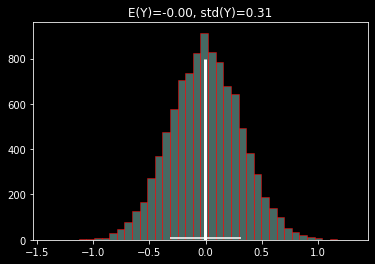

In [84]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

If the number of samples gets larger, the standard error gets smaller.

In [85]:
n = 100
X_s = np.array([stats.norm.rvs(loc=0, scale=std, size=n) for _ in range(n_samples)])
X_s.shape

(10000, 100)

In [86]:
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [87]:
Y_samples.mean(),  std/np.sqrt(n), Y_samples.std(), 

(0.0001009365896851806, 0.1, 0.09941835728054907)

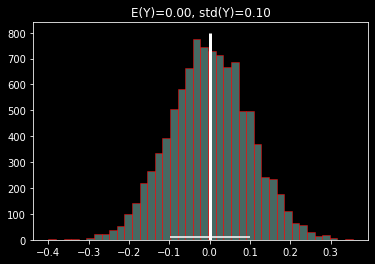

In [88]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

### Uniform [0,1]

In [97]:
print('std_theory: ', stats.uniform.std())

std_theory:  0.28867513459481287


In [89]:
# Sampling from Uniform distriubtion.
n = 100
X_s = np.array([stats.uniform.rvs(size=n) for _ in range(n_samples)])
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), stats.uniform.std()/np.sqrt(n))

0.4997500037724955 0.02877083859097214 0.028867513459481287


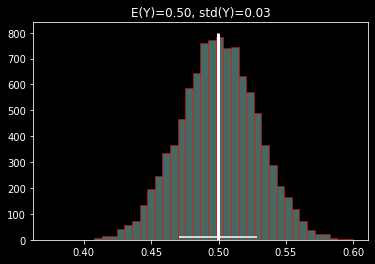

In [90]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

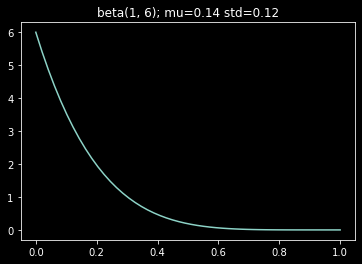

In [91]:
# sampling from non-symmetric distribution
dist = stats.beta(1,6)
#
x = np.linspace(0,1,50)
plt.plot(x, dist.pdf(x));
plt.title(f'beta(1, 6); mu={dist.mean():.2f} std={dist.std():.2f}');

In [92]:
# Sampling from non-symmetric distriubtion.
n = 100
X_s = np.array([dist.rvs(size=n) for _ in range(n_samples)])
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), dist.std()/np.sqrt(n))

0.14313909077651205 0.012496264913259784 0.012371791482634838


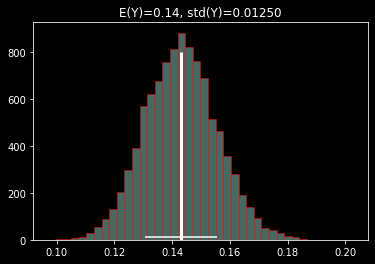

In [93]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.5f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

---
Now, let's think about the situation when you have only one set of samples $S = \{x_i, i = 1, ..., n\}$, $x_i \sim p(x)$, where $p(x)$ is a probabilty distribution. This is a practical case.

- The sample mean is $Y = \sum x_i / n$. This is an estimate of the mean of $X$ or $\mathbb{E}(X)$.
- The sample standard deviation of $S$ is $s = std(S)$. It is an estimate of the standard deviation $\sigma$ of $X$.
- The sample standard error $s/\sqrt{n}$ is an estimate of the standard error $\sigma/\sqrt{n}$.

In [94]:
# Normal distribution
n = 100
normal = stats.norm
print(f'normal(0,1): mu={normal.mean()}, std={normal.std()}')
S = normal.rvs(0, 1, size=n)
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

normal(0,1): mu=0.0, std=1.0
Y: 0.08713611638588349, std: 0.9964758455869268, se: 0.09964758455869269


In [95]:
# Uniform distribution
uniform = stats.uniform
print(f'uniform: mu={uniform.mean()}, std={uniform.std()}')
n = 100
S = uniform.rvs(0, 1, size=n)
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

uniform: mu=0.5, std=0.28867513459481287
Y: 0.4872518952209357, std: 0.2972162930156964, se: 0.02972162930156964


jupyter nbconvert rv_n_distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download --execute

https://blog.jupyter.org/the-templating-system-of-nbconvert-6-47ea781eacd2

In [96]:
!jupyter nbconvert rv_n_distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download

[NbConvertApp] Converting notebook rv_n_distribution.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 309101 bytes to rv_n_distribution.pdf
